# **AIR QUALITY INDEX**

In [ ]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#load the dataset

data = pd.read_csv('AQI.csv')
data.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2023,170,143,27,0,0,0,0,90,54,40,0,0,84,86,0
1,Alabama,Clay,2023,155,109,46,0,0,0,0,83,61,40,0,0,0,155,0
2,Alabama,DeKalb,2023,212,155,55,2,0,0,0,133,63,43,0,0,141,71,0
3,Alabama,Elmore,2023,118,102,16,0,0,0,0,90,54,40,0,0,118,0,0
4,Alabama,Etowah,2023,181,126,55,0,0,0,0,100,64,43,0,0,74,107,0


In [ ]:
# Check for missing values

print(data.isnull().sum())

State                                  0
County                                 0
Year                                   0
Days with AQI                          0
Good Days                              0
Moderate Days                          0
Unhealthy for Sensitive Groups Days    0
Unhealthy Days                         0
Very Unhealthy Days                    0
Hazardous Days                         0
Max AQI                                0
90th Percentile AQI                    0
Median AQI                             0
Days CO                                0
Days NO2                               0
Days Ozone                             0
Days PM2.5                             0
Days PM10                              0
dtype: int64


In [ ]:
data.columns.tolist()

['State',
 'County',
 'Year',
 'Days with AQI',
 'Good Days',
 'Moderate Days',
 'Unhealthy for Sensitive Groups Days',
 'Unhealthy Days',
 'Very Unhealthy Days',
 'Hazardous Days',
 'Max AQI',
 '90th Percentile AQI',
 'Median AQI',
 'Days CO',
 'Days NO2',
 'Days Ozone',
 'Days PM2.5',
 'Days PM10']

In [ ]:
# Feature Engineering

data['Total pollutants days'] = data['Days CO'] + data['Days Ozone'] + data['Days NO2'] + data['Days PM2.5'] + data['Days PM10']

In [ ]:
# Data Normalization

scaler = StandardScaler()
features = ['Days with AQI',
 'Good Days',
 'Moderate Days',
 'Unhealthy for Sensitive Groups Days',
 'Unhealthy Days',
 'Very Unhealthy Days',
 'Hazardous Days',
 'Max AQI',
 '90th Percentile AQI',
 'Median AQI',
 'Days CO',
 'Days NO2',
 'Days Ozone',
 'Days PM2.5',
 'Days PM10']
data[features] = scaler.fit_transform(data[features])

In [ ]:
# columns to consider for histograms

columns = ['Max AQI', 'Good Days', 'Moderate Days', 'Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days']

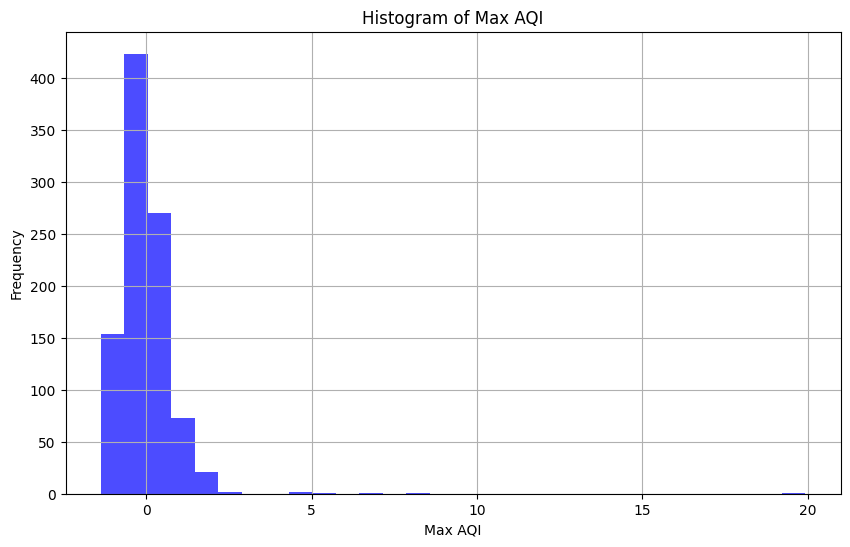

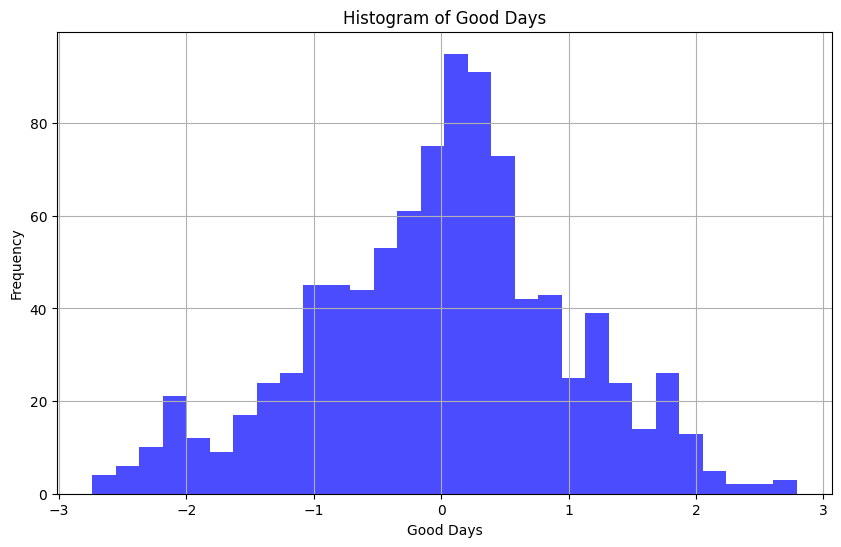

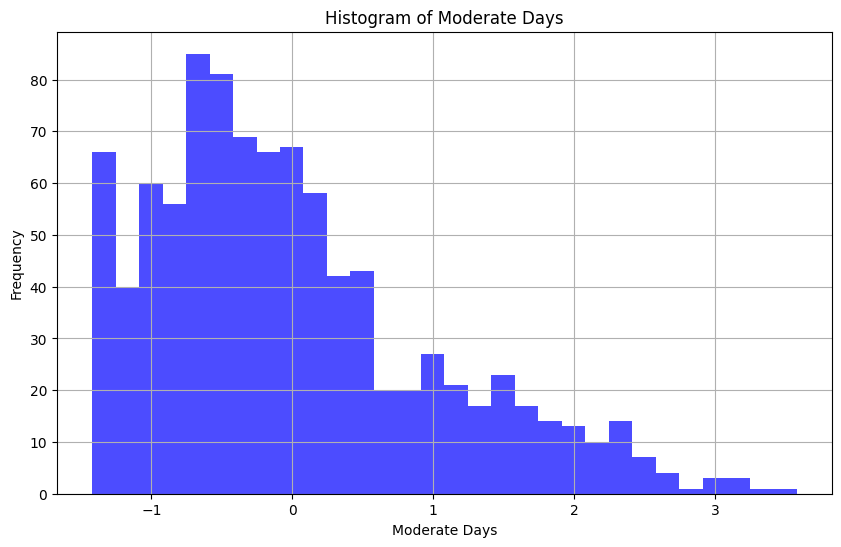

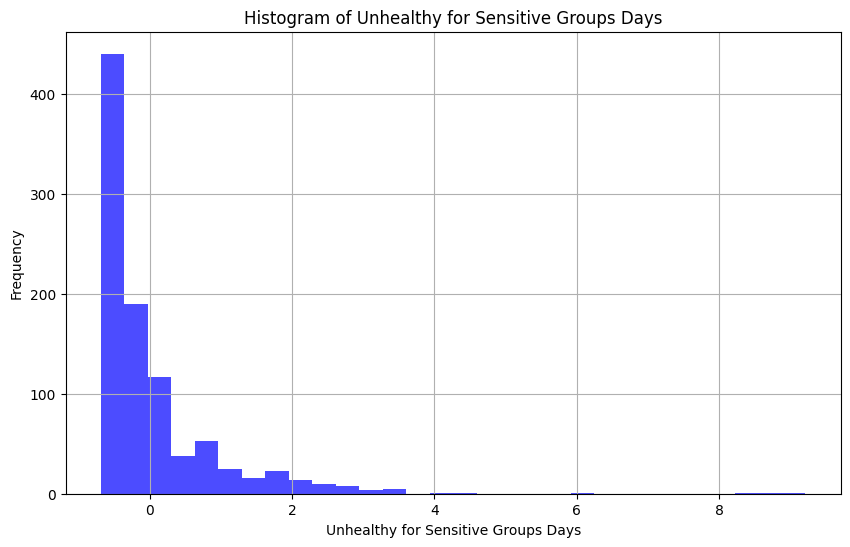

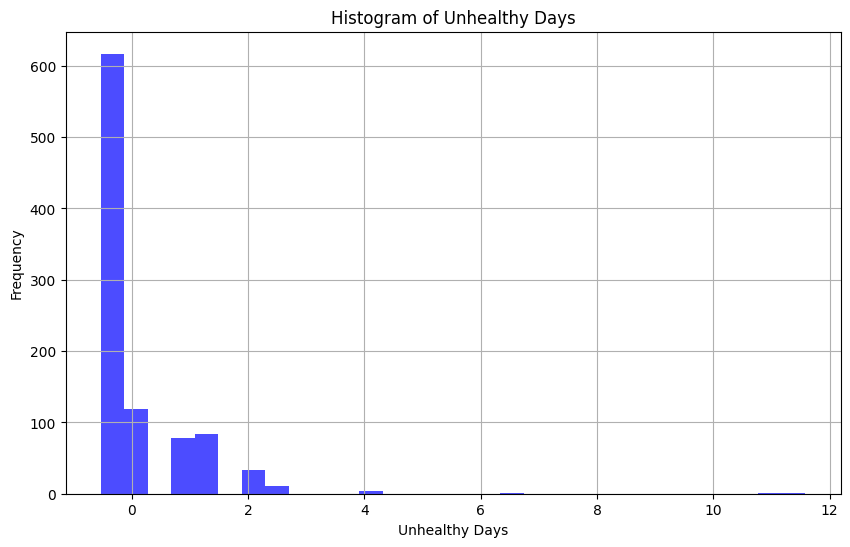

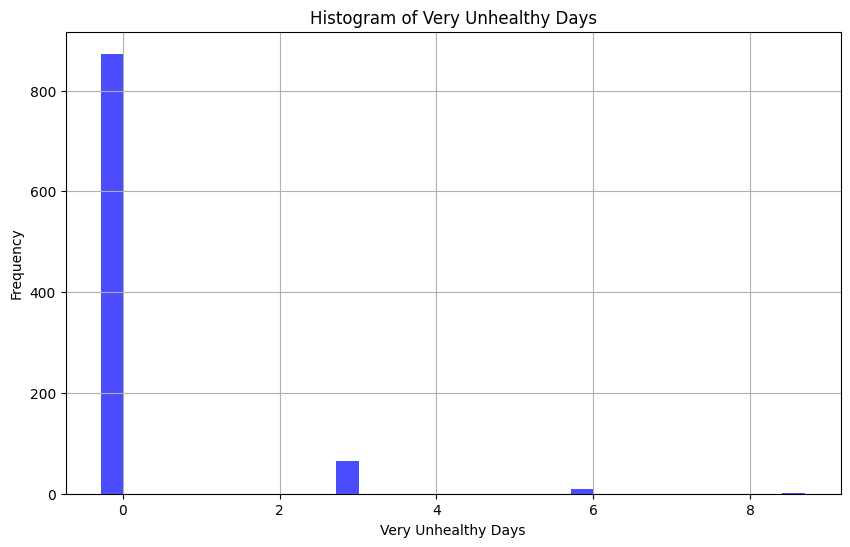

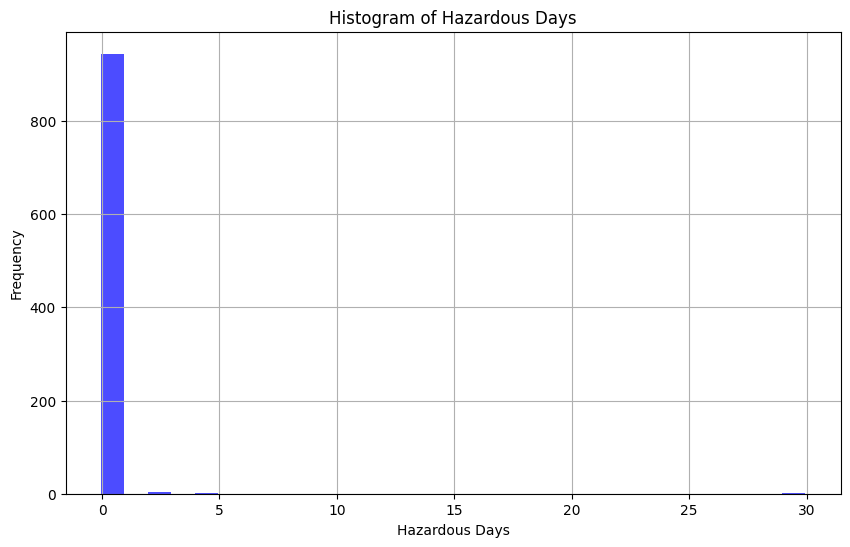

In [ ]:
# histogram
for column in columns:
  plt.figure(figsize=(10, 6))
  plt.hist(data[column], bins=30, alpha=0.7, color='blue')
  plt.title(f'Histogram of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()

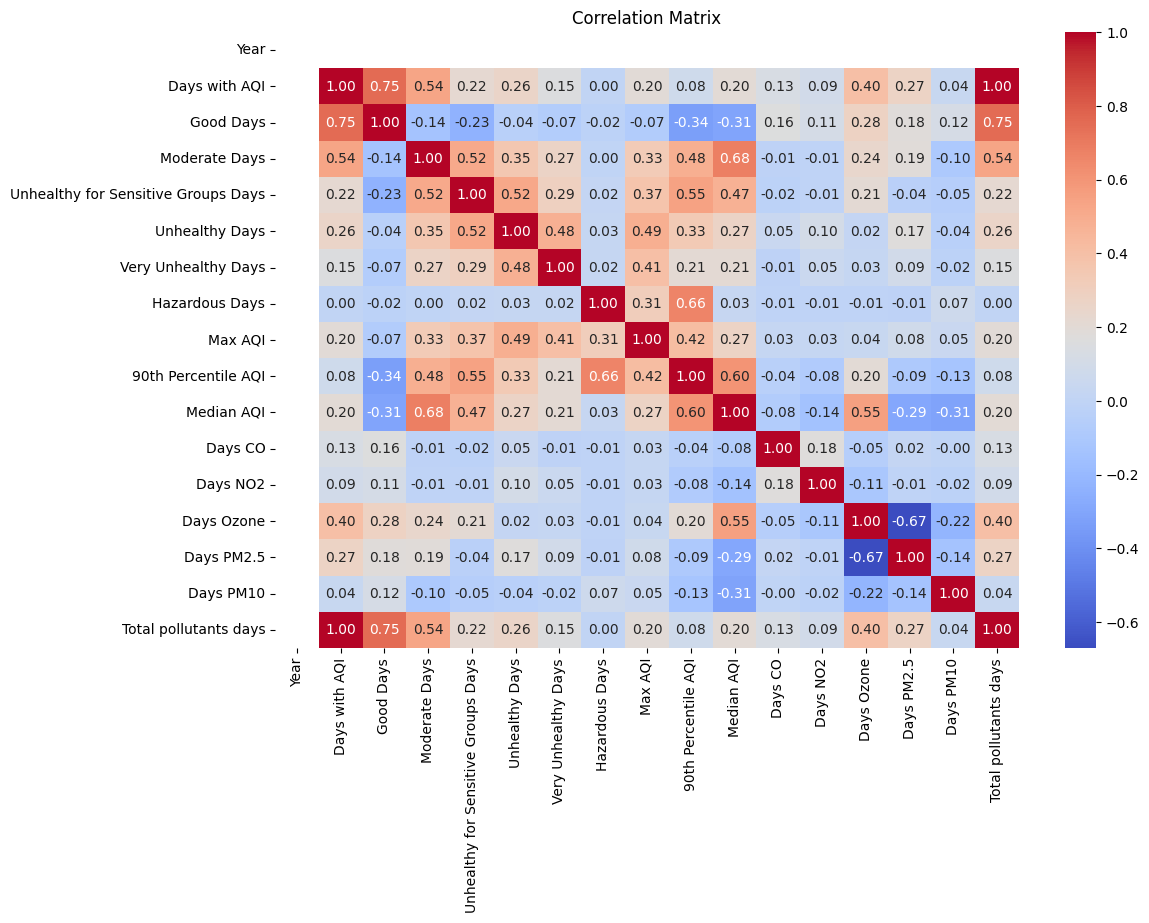

In [ ]:
#Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Heatmap of correlation

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Data Modeling

In [ ]:
# Drop Non-Numeric Column
X = data.drop(columns=['Max AQI', 'State', 'County'])

y = pd.to_numeric(data['Max AQI'], errors = 'coerce')

#Drop NAN value

x = X.dropna()
y = y[X.index]

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train and Evaluate

In [ ]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
lr_predict = lr_model.predict(X_test)

# Evaluate the model
print("Linear Regression Model: ")
print(f"MAE : {mean_absolute_error(y_test, lr_predict)}")
print(f"MSE : {mean_squared_error(y_test, lr_predict)}")
print(f"R2 : {r2_score(y_test, lr_predict)}")

Linear Regression Model: 
MAE : 0.41889126764360846
MSE : 2.353746196000991
R2 : 0.09407505286729034


In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor()

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_predict = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model: ")
print(f"MAE : {mean_absolute_error(y_test, rf_predict)}")
print(f"MSE : {mean_squared_error(y_test, rf_predict)}")
print(f"R2 : {r2_score(y_test, rf_predict)}")

Random Forest Model: 
MAE : 0.2209217329557595
MSE : 1.2502561820604075
R2 : 0.5187933739161139


In [ ]:
#Suport Vector Regression(SVR)
svr_model = SVR(kernel=r'rbf')
svr_model.fit(X_train, y_train)

# Make predictions
svr_predictions = svr_model.predict(X_test)

# Evaluate the model
print("SVR Performance: ")
print(f"MAE : {mean_absolute_error(y_test, svr_predictions)}")
print(f"MSE : {mean_squared_error(y_test, svr_predictions)}")
print(f"R2 : {r2_score(y_test, svr_predictions)}")

SVR Performance: 
MAE : 0.6056209625457133
MSE : 2.594290779095907
R2 : 0.0014927094126055973
